In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**load dataset**

In [ ]:
medical_df =pd.read_csv("/content/heart_dataset_mini.csv")
medical_df

,age,sex,chol
0,63,1,233
1,37,1,250
2,41,0,204
3,56,1,236
4,57,0,354
...,...,...,...
298,57,0,241
299,45,1,264
300,68,1,193
301,57,1,131


In [ ]:
x = medical_df[["age","chol"]]
x

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [ ]:
x.isnull().sum()

age     0
chol    0
dtype: int64

In [ ]:
x.describe()

,age,chol
count,303.000000,303.000000
mean,54.366337,246.264026
std,9.082101,51.830751
min,29.000000,126.000000
25%,47.500000,211.000000
50%,55.000000,240.000000
75%,61.000000,274.500000
max,77.000000,564.000000


Text(0, 0.5, 'age')

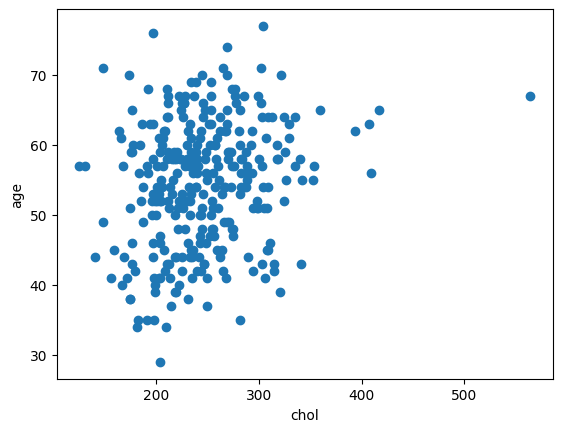

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x.chol,x.age)
plt.xlabel("chol")
plt.ylabel("age")

In [ ]:
scalars = StandardScaler()
x = scalars.fit_transform(x)

In [ ]:
list(range(2, 12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
model_labels = {}
centroids = {}
i_score = []
s_score = []

for k in range(2, 12):
    # model building
    model = KMeans(n_clusters=k)

    # model fit
    model = model.fit(x)

    # get the output labels
    labels = model.labels_
    model_labels[k] = labels

    # inertia
    i_score.append(model.inertia_)

    # silhouette
    s_score.append(silhouette_score(x, labels))

    # centroids
    centroids[k] = model.cluster_centers_

    print(f"------inertia {model.inertia_} silhouette {silhouette_score(x, labels)}")


------inertia 375.14224818605453 silhouette 0.35642725100730843
------inertia 256.9598573689618 silhouette 0.3603326502768412
------inertia 207.02899470535087 silhouette 0.3445265642880061
------inertia 165.33932445549365 silhouette 0.34808472467231666
------inertia 138.23228354639866 silhouette 0.35545665042112157
------inertia 120.3556170177614 silhouette 0.34065726305522054
------inertia 107.04395519573978 silhouette 0.3354385532747454
------inertia 94.05774157905023 silhouette 0.33239060776675816
------inertia 83.60604225686909 silhouette 0.35023332237103594
------inertia 73.64323613027986 silhouette 0.3553794626599595


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'k')

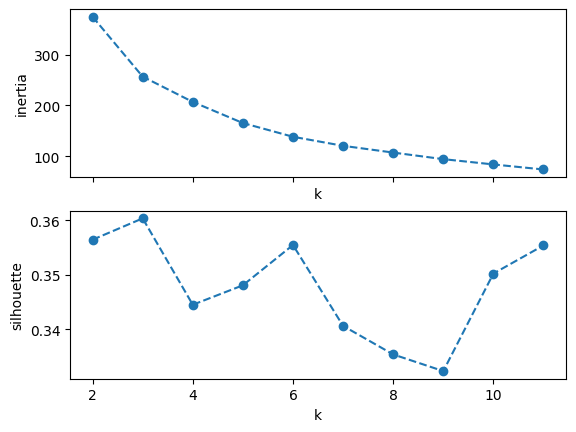

In [ ]:
fig,ax = plt.subplots(2,1,sharex = True)
plt.subplot(211) #row,column,plot
plt.plot(range(2,12), i_score,"o--")
plt.ylabel("inertia")
plt.xlabel("k")



plt.subplot(212) #row,column,plot
plt.plot(range(2,12), s_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("k")

In [ ]:
k_labels = model_labels[3]

In [ ]:
k_centroid = centroids[3]

Text(0, 0.5, 'age')

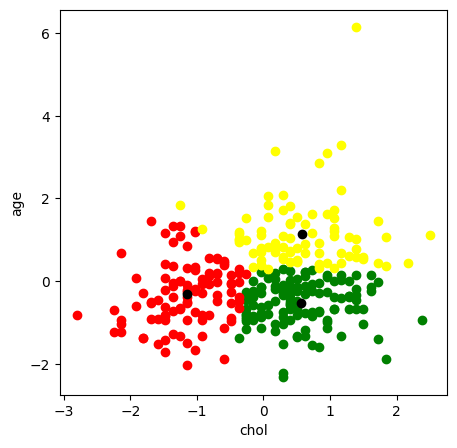

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
#1st_cluster
plt.scatter(x[k_labels == 0,0],x[k_labels == 0,1], c="green",label= "cluster1")
#2nd_cluster
plt.scatter(x[k_labels == 1,0],x[k_labels == 1,1], c="red",label= "cluster2")
#3rd_cluster
plt.scatter(x[k_labels == 2,0],x[k_labels == 2,1], c="yellow",label= "cluster3")
#3 cluster centroids
plt.scatter(k_centroid[:,0],k_centroid[:,1],c= "black", label= "centroids")
plt.xlabel("chol")
plt.ylabel("age")

In [ ]:
analysis=medical_df[["age","chol"]].copy()
analysis

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [ ]:
analysis ["label"] = k_labels
analysis

,age,chol,label
0,63,233,0
1,37,250,1
2,41,204,1
3,56,236,0
4,57,354,2
...,...,...,...
298,57,241,0
299,45,264,1
300,68,193,0
301,57,131,0


In [ ]:
analysis.groupby("label")["age","chol"].mean()

,age,chol
label,,
0,59.470588,218.285714
1,43.920000,230.530000
2,59.571429,304.630952


In [ ]:
import numpy as np

person_01 = np.array([[30,150]])
person_01

array([[ 30, 150]])

In [ ]:
person_01= scalars.transform(person_01)
person_01

array([[-6.29238246, -4.79512322]])

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(x)

In [ ]:
model.predict(person_01)

array([0], dtype=int32)